In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
df = pd.read_csv(url)

# Optional: save to a local file
df.to_csv("monthly-sunspots.csv", index=False)


In [2]:
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
df = pd.read_csv(url,header=0,index_col=0,parse_dates=[0])


In [4]:
df

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


In [5]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot


<Axes: xlabel='Month'>

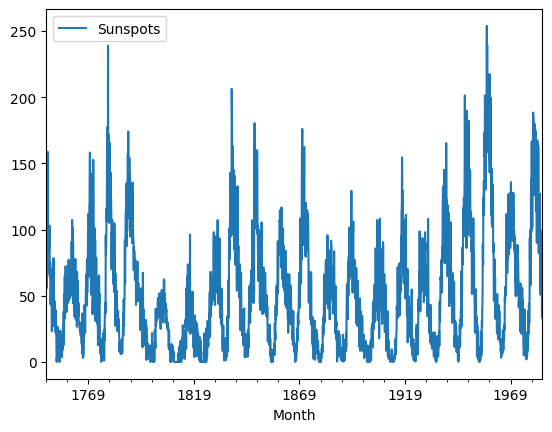

In [6]:
df.plot()

In [7]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

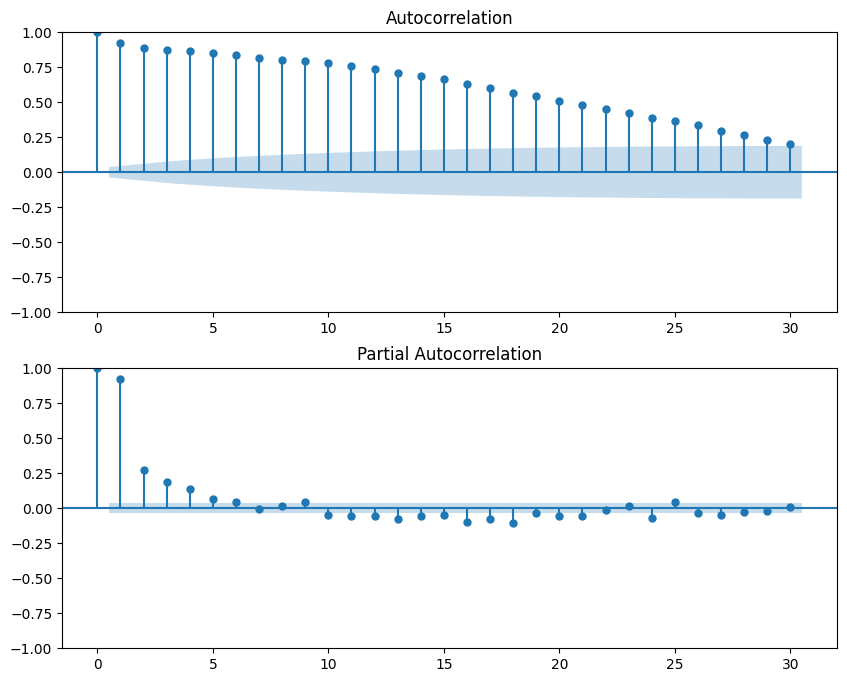

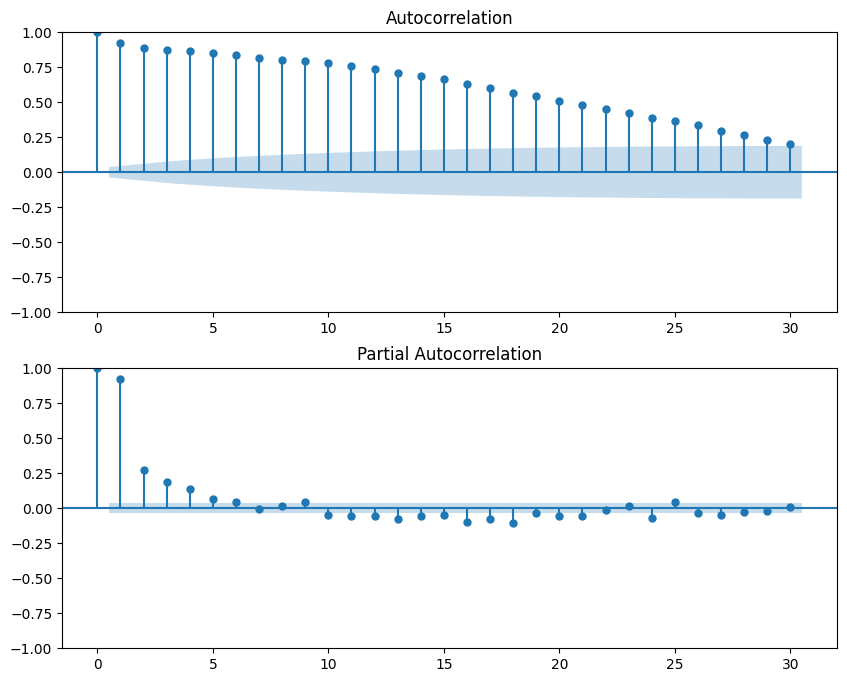

In [8]:
fig,axes=plt.subplots(2,1,figsize=(10,8))
plot_acf(df['Sunspots'],lags=30,ax=axes[0])
plot_pacf(df['Sunspots'],lags=30,ax=axes[1])

In [9]:
arma=ARIMA(df,order=(2,1,0)).fit()
print(arma.params)

C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ar.L1      -0.362901
ar.L2      -0.206377
sigma2    257.488485
dtype: float64


In [10]:
arma.aic

23652.73832129772

In [11]:
arma.bic

23670.57073377106

In [12]:
arma.hqic

23659.17292670253

In [13]:
resid=arma.resid

In [14]:
stats.normaltest(resid)

NormaltestResult(statistic=298.9150626302361, pvalue=1.2342947193391598e-65)

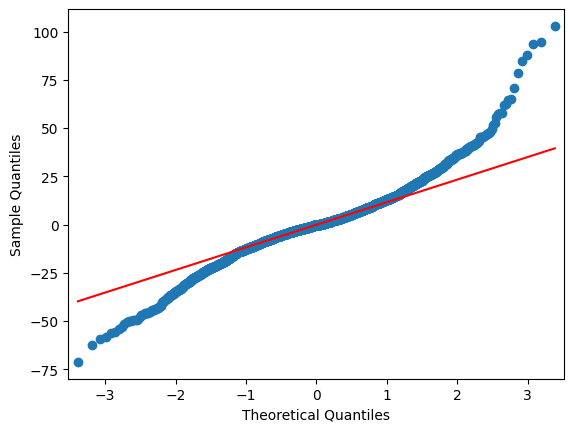

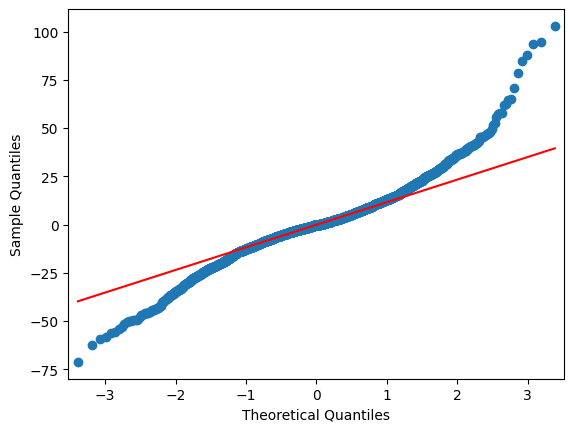

In [15]:
qqplot(resid,line="q")

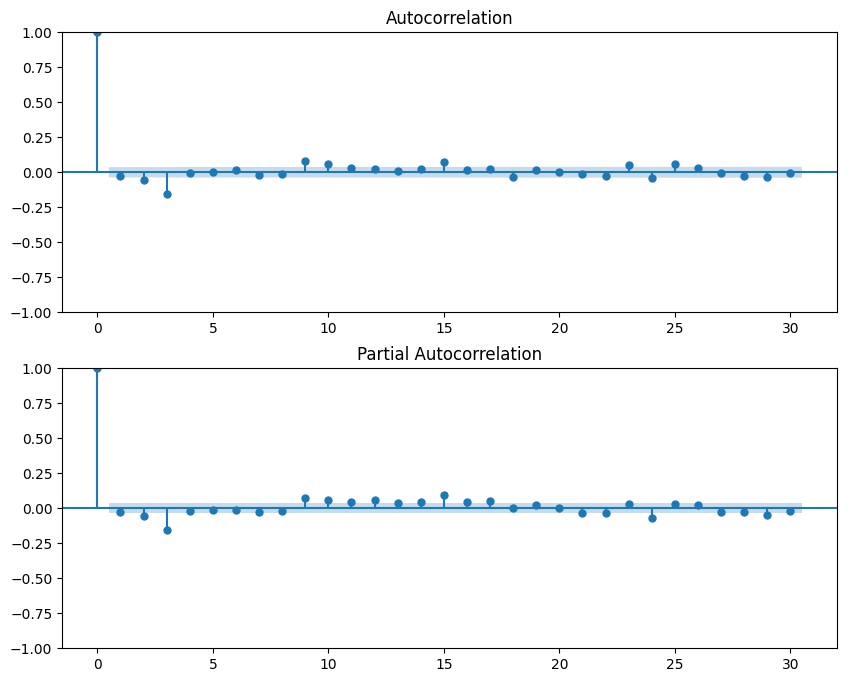

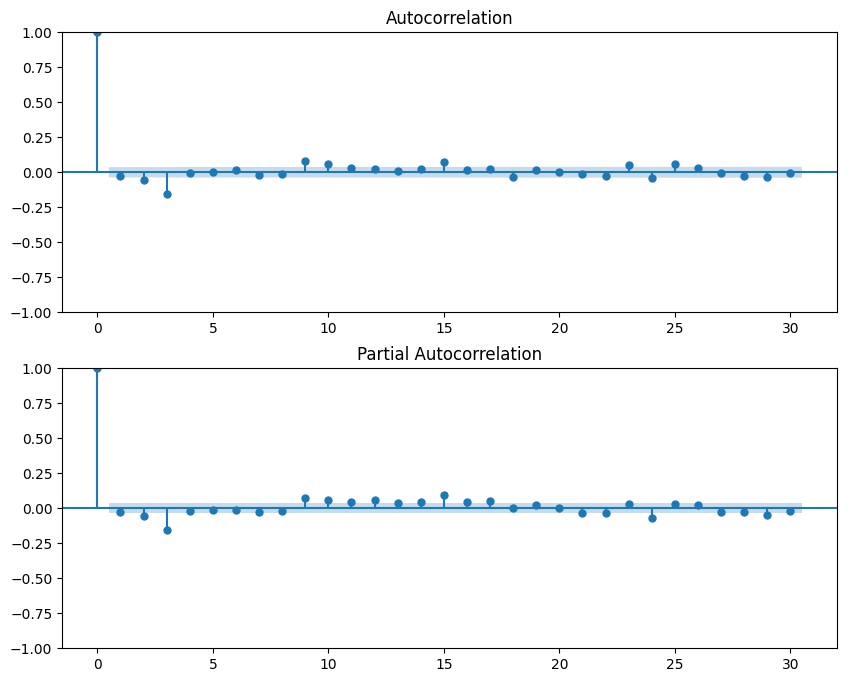

In [16]:
fig,axes=plt.subplots(2,1,figsize=(10,8))
plot_acf(resid,lags=30,ax=axes[0])
plot_pacf(resid,lags=30,ax=axes[1])

In [17]:
r,q,p=sm.tsa.acf(resid.values.squeeze(),fft=True,qstat=True)
data=np.c_[np.arange(1,35),r[1:],q,p]
df2 = pd.DataFrame(data, columns = ['Lag', 'AC', 'Q', 'Prob(>Q)'])
df2.set_index('Lag')

,AC,Q,Prob(>Q)
Lag,,,
1.0,-0.030155,2.567078,1.091091e-01
2.0,-0.055841,11.372865,3.391671e-03
3.0,-0.154238,78.577772,6.195389e-17
4.0,-0.007441,78.734229,3.229291e-16
5.0,0.004663,78.795694,1.498761e-15
6.0,0.018050,79.717064,4.087474e-15
7.0,-0.020932,80.956595,8.789245e-15
8.0,-0.013975,81.509332,2.427704e-14
9.0,0.077230,98.395121,3.321118e-17


In [18]:
r,q,p=sm.tsa.acf(resid.values.squeeze(),fft=True,qstat=True)
len(q)

34

In [19]:
r,q,p=sm.tsa.acf(resid.values.squeeze(),fft=True,qstat=True)
len(q)
data=np.c_[np.arange(1,35),r[1:],q,p]

In [20]:
df2=pd.DataFrame(data,columns=['Lag','AC','Q','PROB'])
df2.set_index('Lag')

,AC,Q,PROB
Lag,,,
1.0,-0.030155,2.567078,1.091091e-01
2.0,-0.055841,11.372865,3.391671e-03
3.0,-0.154238,78.577772,6.195389e-17
4.0,-0.007441,78.734229,3.229291e-16
5.0,0.004663,78.795694,1.498761e-15
6.0,0.018050,79.717064,4.087474e-15
7.0,-0.020932,80.956595,8.789245e-15
8.0,-0.013975,81.509332,2.427704e-14
9.0,0.077230,98.395121,3.321118e-17


In [21]:
df.tail()

,Sunspots
Month,
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8
1983-11-01,33.3
1983-12-01,33.4


In [25]:
predict_sunspots = arma.predict('1970', '1983', dynamic=False)
print(predict_sunspots)

1970-01-01     96.757268
1970-02-01    105.656492
1970-03-01    119.077990
1970-04-01    108.572274
1970-05-01    112.243651
                 ...    
1983-08-01     87.101471
1983-09-01     77.410924
1983-10-01     60.248686
1983-11-01     58.241159
1983-12-01     40.330187
Freq: MS, Name: predicted_mean, Length: 168, dtype: float64


In [26]:
def mean_forecast_err(y,yhat):
    return y.sub(yhat).mean()

In [29]:
mean_forecast_err(df['Sunspots'],predict_sunspots)

-0.5629825418451395

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA

# Convert your DataFrame to a 1D numpy array
data_array = df.values.squeeze()

# Store results: p, q, average R²
avg_errors = []

# Try different values of p and q (ARIMA(p, 0, q))
for p in range(4):   # Try p = 0, 1, 2, 3
    for q in range(4):  # Try q = 0, 1, 2, 3
        errors = []
        tscv = TimeSeriesSplit(test_size=10)

        for train_idx, test_idx in tscv.split(data_array):
            x_train, x_test = data_array[train_idx], data_array[test_idx]
            x_test_orig = x_test.copy()
            preds = []

            for _ in range(10):  # Forecast step-by-step
                try:
                    model = ARIMA(x_train, order=(p, 0, q))
                    result = model.fit()
                    pred = result.forecast(steps=1)[0]
                except:
                    pred = -999999  # Handle errors gracefully

                preds.append(pred)

                # Update train and test sets (walk-forward)
                x_train = np.append(x_train, x_test[0])
                x_test = x_test[1:]

            # Compute R² score for this fold
            errors.append(r2_score(x_test_orig, preds))

        # Average R² across all splits for this (p, q)
        avg_r2 = np.mean(errors)
        avg_errors.append([p, q, avg_r2])
        print(f"Tested ARIMA({p},0,{q}) - Avg R2: {avg_r2:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(avg_errors, columns=['p', 'q', 'r2'])

# Find the best (p,q) based on highest average R²
best_result = results_df.loc[results_df['r2'].idxmax()]
best_p, best_q = int(best_result['p']), int(best_result['q'])
print(f"\n✅ Best ARIMA(p,0,q): ({best_p}, 0, {best_q}) with Avg R2: {best_result['r2']:.4f}")


Tested ARIMA(0,0,0) - Avg R2: -16.4862
Tested ARIMA(0,0,1) - Avg R2: -5.8132
Tested ARIMA(0,0,2) - Avg R2: -3.0014
Tested ARIMA(0,0,3) - Avg R2: -2.0962
Tested ARIMA(1,0,0) - Avg R2: -0.4587
Tested ARIMA(1,0,1) - Avg R2: -0.2731
Tested ARIMA(1,0,2) - Avg R2: -0.2168
Tested ARIMA(1,0,3) - Avg R2: -0.2176
Tested ARIMA(2,0,0) - Avg R2: -0.3729
Tested ARIMA(2,0,1) - Avg R2: -0.2205
Tested ARIMA(2,0,2) - Avg R2: -0.2172
Tested ARIMA(2,0,3) - Avg R2: -0.2170
Tested ARIMA(3,0,0) - Avg R2: -0.3130
Tested ARIMA(3,0,1) - Avg R2: -0.2145


C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

Tested ARIMA(3,0,2) - Avg R2: -0.1782


C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tested ARIMA(3,0,3) - Avg R2: -0.2230

✅ Best ARIMA(p,0,q): (3, 0, 2) with Avg R2: -0.1782


C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

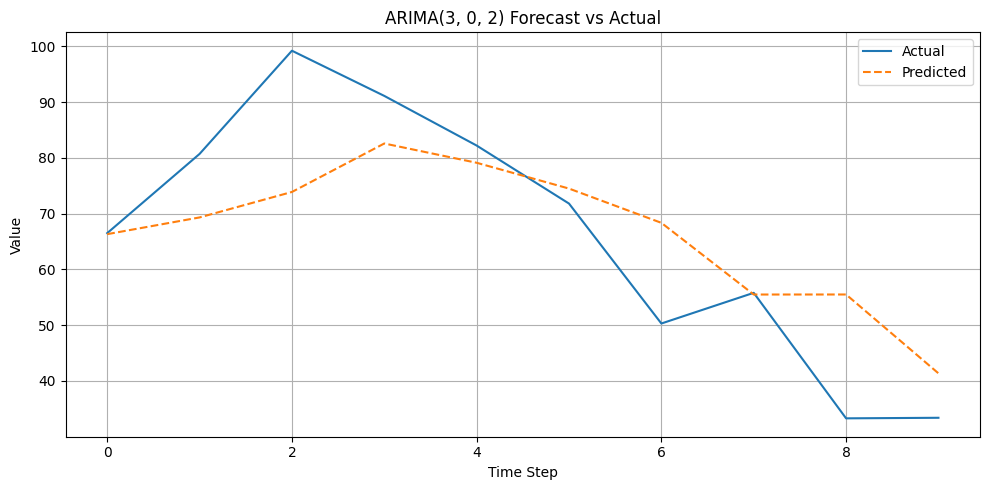

In [31]:
# Use last 10 data points as test set
X_train, X_test = data_array[:-10], data_array[-10:]
X_test_orig = X_test.copy()
preds = []

# Forecast 10 steps ahead using walk-forward method
for _ in range(10):
    model = ARIMA(X_train, order=(best_p, 0, best_q))
    result = model.fit()
    pred = result.forecast(steps=1)[0]
    preds.append(pred)

    # Update X_train with actual value, move forward
    X_train = np.append(X_train, X_test[0])
    X_test = X_test[1:]

# 📊 Plot predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(X_test_orig, label='Actual')
plt.plot(preds, label='Predicted', linestyle='--')
plt.title(f"ARIMA({best_p}, 0, {best_q}) Forecast vs Actual")
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
from sklearn.metrics import r2_score 
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
data_array=df.values.squeeze()
avg_errors=[]
for p in range(1):
    for q in range(1):
        errors=[]
        tscv=TimeSeriesSplit(test_size=10)
        for i1,i2 in tscv.split(data_array):
            x_train,x_test=data_array[i1],data_array[i2]
            x_test_orig=x_test.copy()
            preds=[]
            for _ in range(10):
                try:
                    model=ARIMA(x_train,order(p,0,q))
                    result=model.fit()
                    pred=result.forecast(steps=1)[0]
                except:
                    pred=-99999999
                preds.append(pred)
                x_train=np.append(x_train,x_test[0])
                x_test=x_test[1:]
            errors.append(r2_score(x_test_orig,preds))
        avgr2=np.mean(errors)
        avg_errors.append([p,q,avgr2])
resdf=pd.DataFrame(avg_errors,columns=['p','q','r2'])
best=resdf.loc[resdf['r2'].idxmax()]
best_p,best_q=int(best['p']),int(best['q'])
print(best_p)
print(best_q)

0
0


C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

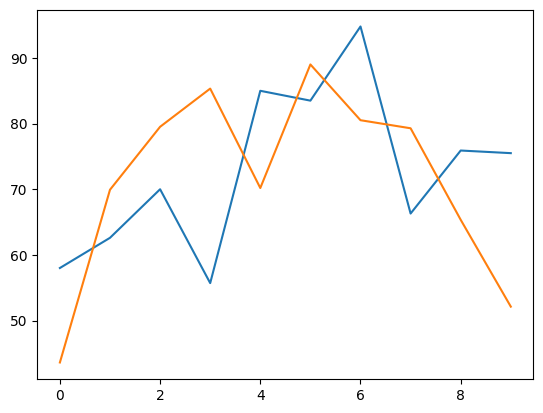

In [36]:
x_test,x_train=data_array[:10],data_array[-10:]
x_test_orig=x_test.copy()
preds=[]
for _ in range(10):
    mod=ARIMA(x_train,order=(3,0,3))
    res=mod.fit()
    preds.append(res.forecast(steps=1))
    x_train=np.append(x_train,x_test[0])
    x_test=x_test[1:]
plt.plot(x_test_orig)
plt.plot(preds)

In [37]:
df

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


In [39]:
df1=df.resample('QE').mean()
df1

,Sunspots
Month,
1749-03-31,63.533333
1749-06-30,74.733333
1749-09-30,79.000000
1749-12-31,106.433333
1750-03-31,79.466667
...,...
1982-12-31,106.600000
1983-03-31,67.266667
1983-06-30,90.333333


In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

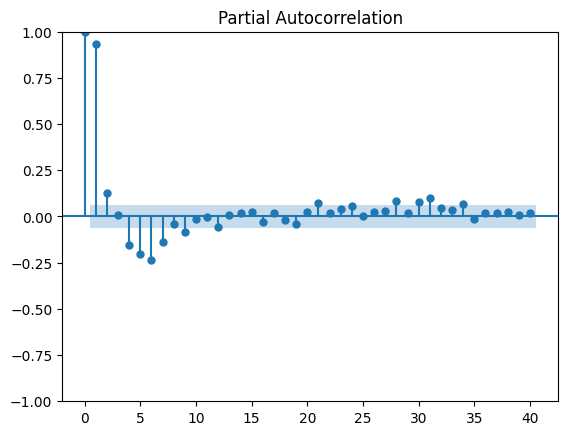

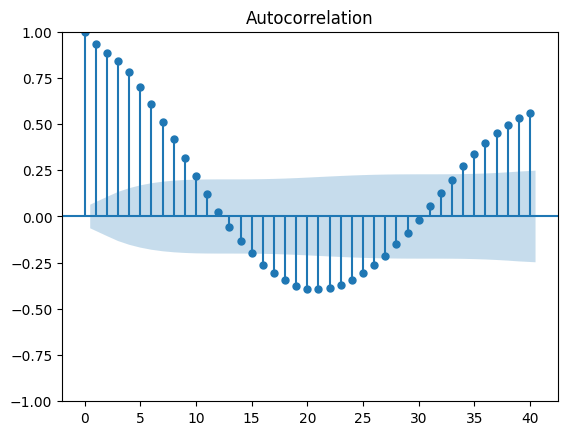

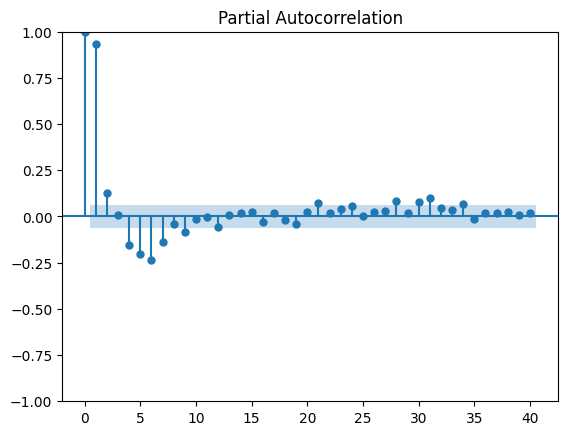

In [42]:
plot_acf(df1['Sunspots'],lags=40)
plot_pacf(df1['Sunspots'],lags=40)

C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

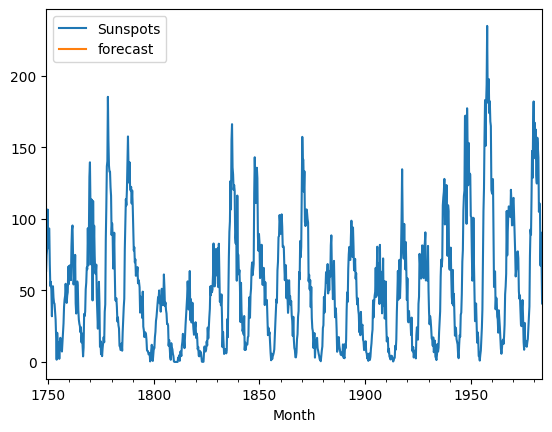

In [45]:
model=sm.tsa.statespace.SARIMAX(df1['Sunspots'],order=(2,0,2),seasonal_order=(2,0,2,6))
result=model.fit()
df1['forecast']=result.predict(start=1000,end=1084,dynamic=False)
df1[['Sunspots','forecast']].plot()

In [81]:
custom_column_names=['WSR0','WSR1']
df=pd.read_csv('eighthr.data.csv',header=None,parse_dates=[0],index_col=[0],na_values=['?'],names=custom_column_names+list(range(3,74)))

C:\Users\sadhi\AppData\Local\Temp\ipykernel_21452\2161621045.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('eighthr.data.csv',header=None,parse_dates=[0],index_col=[0],na_values=['?'],names=custom_column_names+list(range(3,74)))


In [82]:
df.head()

,WSR0,WSR1,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
1998-01-01,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795.0,-12.10,17.9,10330.0,-55.0,0.00,0.0
1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805.0,14.05,29.0,10275.0,-55.0,0.00,0.0
1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.60,6.94,9.80,5790.0,17.90,41.3,10235.0,-40.0,0.00,0.0
1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775.0,31.15,51.7,10195.0,-40.0,2.08,0.0
1998-01-05,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0


In [83]:
df=df.dropna()
df

,WSR0,WSR1,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
1998-01-01,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00,0.0
1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00,0.0
1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00,0.0
1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08,0.0
1998-01-07,3.7,3.2,3.8,5.1,6.0,7.0,6.3,6.4,6.3,5.4,...,0.84,6.86,25.60,5695.0,26.75,48.45,10040.0,-80.0,0.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-12-27,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800.0,-25.60,21.80,10295.0,65.0,0.00,0.0
2004-12-28,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845.0,-19.40,19.10,10310.0,15.0,0.00,0.0
2004-12-29,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.80,-0.64,5845.0,-9.60,35.20,10275.0,-35.0,0.00,0.0
2004-12-30,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,0.25,7.72,-0.89,5845.0,-19.60,34.20,10245.0,-30.0,0.05,0.0


In [84]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.statespace.varmax import VARMAX
g1=grangercausalitytests(df[['WSR0','WSR1']],2)
g2=grangercausalitytests(df[['WSR1','WSR0']],2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1176  , p=0.0238  , df_denom=1843, df_num=1
ssr based chi2 test:   chi2=5.1260  , p=0.0236  , df=1
likelihood ratio test: chi2=5.1189  , p=0.0237  , df=1
parameter F test:         F=5.1176  , p=0.0238  , df_denom=1843, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3865  , p=0.0922  , df_denom=1840, df_num=2
ssr based chi2 test:   chi2=4.7860  , p=0.0914  , df=2
likelihood ratio test: chi2=4.7798  , p=0.0916  , df=2
parameter F test:         F=2.3865  , p=0.0922  , df_denom=1840, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.5489 , p=0.0004  , df_denom=1843, df_num=1
ssr based chi2 test:   chi2=12.5693 , p=0.0004  , df=1
likelihood ratio test: chi2=12.5267 , p=0.0004  , df=1
parameter F test:         F=12.5489 , p=0.0004  , df_denom=1843, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.2531  , p=0.

In [85]:
df['WSR0']=df['WSR0'].astype(float)
from statsmodels.tsa.api import VAR
train=df[['WSR0','WSR1']]
model=VAR(train)
sortedmodel=model.select_order(maxlags=20)
sortedmodel.summary()

C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-0.9695,-0.9635,0.3793,-0.9673
1,-1.091,-1.073*,0.3358,-1.085*
2,-1.089,-1.058,0.3367,-1.077
3,-1.088,-1.046,0.3368,-1.073
4,-1.088,-1.034,0.3369,-1.068
5,-1.091,-1.024,0.3359,-1.066
6,-1.098,-1.020,0.3335,-1.069
7,-1.096,-1.005,0.3342,-1.063
8,-1.098,-0.9950,0.3337,-1.060
9,-1.097,-0.9820,0.3340,-1.054


In [86]:
var_model=VARMAX(train,order=(10,0),enforce_stationarity=True)
fitmodel=var_model.fit()
fitmodel.summary()

C:\Users\sadhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Dep. Variable:,"['WSR0', 'WSR1']",No. Observations:,1847
Model:,VAR(10),Log Likelihood,-4182.460
,+ intercept,AIC,8454.920
Date:,"Tue, 06 May 2025",BIC,8703.379
Time:,12:51:04,HQIC,8546.517
Sample:,0,,
,- 1847,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.07, 0.00",Jarque-Bera (JB):,"196.56, 7463.04"
Prob(Q):,"0.79, 0.97",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.62, 0.66",Skew:,"0.74, 0.80"


In [87]:
pred=fitmodel.get_prediction()
preds=pred.predicted_mean
preds.columns=['p1','p2']
preds

,p1,p2
1998-01-01,1.630687,1.572075
1998-01-02,1.479033,1.441289
1998-01-03,2.075244,1.978361
1998-01-04,2.063785,1.995551
1998-01-07,2.683971,2.581811
...,...,...
2004-12-27,1.397893,1.363057
2004-12-28,1.339691,1.332212
2004-12-29,1.231025,1.134638
2004-12-30,1.331284,1.279619


In [88]:
tp=pd.concat([train,preds])

In [89]:
tp

,WSR0,WSR1,p1,p2
1998-01-01,0.8,1.8,NaN,NaN
1998-01-02,2.8,3.2,NaN,NaN
1998-01-03,2.9,2.8,NaN,NaN
1998-01-04,4.7,3.8,NaN,NaN
1998-01-07,3.7,3.2,NaN,NaN
...,...,...,...,...
2004-12-27,NaN,NaN,1.397893,1.363057
2004-12-28,NaN,NaN,1.339691,1.332212
2004-12-29,NaN,NaN,1.231025,1.134638
2004-12-30,NaN,NaN,1.331284,1.279619


<Axes: >

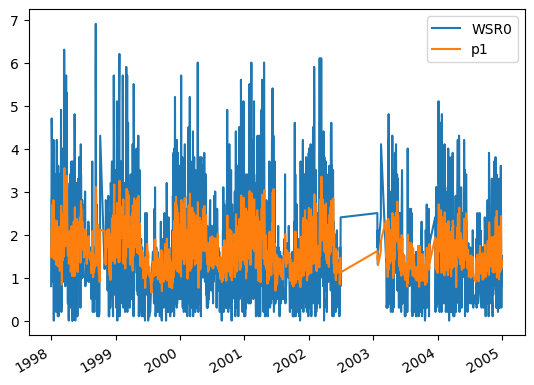

In [90]:
tp[['WSR0','p1']].plot()

<Axes: >

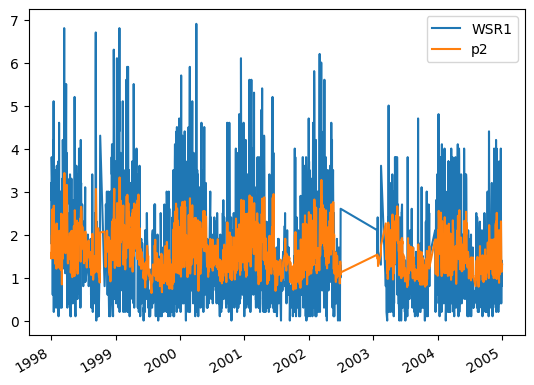

In [91]:
tp[['WSR1','p2']].plot()

In [92]:
from sklearn.metrics import *

In [96]:
# Align forecast with future dates only
future_dates = train.index[-len(preds):]  # Or generate future index if truly forecasting
preds.index = future_dates

# Add only predictions to a copy
df_copy = df.copy()
train[['p1', 'p2']] = preds  # Will preserve existing values


C:\Users\sadhi\AppData\Local\Temp\ipykernel_21452\809075299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['p1', 'p2']] = preds  # Will preserve existing values
C:\Users\sadhi\AppData\Local\Temp\ipykernel_21452\809075299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['p1', 'p2']] = preds  # Will preserve existing values


In [98]:
train

,WSR0,WSR1,p1,p2
1998-01-01,0.8,1.8,1.630687,1.572075
1998-01-02,2.8,3.2,1.479033,1.441289
1998-01-03,2.9,2.8,2.075244,1.978361
1998-01-04,4.7,3.8,2.063785,1.995551
1998-01-07,3.7,3.2,2.683971,2.581811
...,...,...,...,...
2004-12-27,0.3,0.4,1.397893,1.363057
2004-12-28,1.0,1.4,1.339691,1.332212
2004-12-29,0.8,0.8,1.231025,1.134638
2004-12-30,1.3,0.9,1.331284,1.279619
